<a href="https://colab.research.google.com/github/PomesHouse/SkillTreePython-DataAnalysis/blob/main/03.%ED%86%B5%EA%B3%84%EA%B8%B0%EB%B0%98%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/ch03_06_%EA%B8%B0%EC%B4%88%ED%86%B5%EA%B3%84_%EB%B6%84%ED%8F%AC%ED%86%B5%EA%B3%84%EB%9F%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch03.06. 기초통계 - 분포통계량
---
* 날짜:
* 이름:

## 학습내용
    - 백분위수, 사분위수
    - 왜도
    - 첨도

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##  분포 통계
---

* 분포통계는 데이터의 위치나 모양을 확인

### **| 데이터 생성**

```
# 아래의 함수는 정규분포를 따르는 랜덤한 실수를 반환합니다.
np.random.normal(loc, scale, size)
# loc = 평균
# scale = 표준편차
# size = 추출할 데이터(표본)의 크기
```

* 평균 0, 표준편차 1인 정규분포 데이터 1000개를 생성하기

In [2]:
# 넘파이 랜덤 시드 0으로 설정
np.random.seed(0)
# 넘파이 배열 `a`로 바인딩
a = np.random.normal(0, 1, 1000)

* `a` 분포 그리기

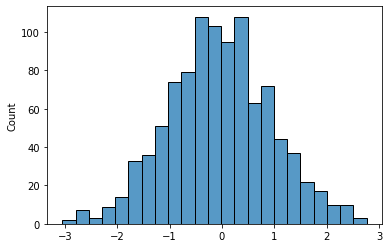

In [3]:
sns.histplot(a)
plt.show()

### **| 백분위수와 사분위수**

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0306-03.png?raw=true width=800>
</p>

```
np.percentile(x,  percent)
np.quantile(x, percent_ratio)
```

* 하위 10% 에 위치한 값 확인

In [4]:
# percentile 사용
print(np.percentile(a, 10))
# quantile 사용
print(np.quantile(a, 0.1))

-1.2991423253580128
-1.2991423253580128


* 하위 80% 에 위치한 값 확인

In [5]:
# percentile 사용
print(np.percentile(a, 80))
# quantile 사용
print(np.quantile(a, 0.8))

0.7883967913601156
0.7883967913601156


### **| 왜도 (skew)**

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0306-01.png?raw=true width=800>
</p>



\begin{align}
\text{skew} = 
\frac{\tfrac{1}{N} \sum_{i=1}^N (x_i-\overline{x})^3}{ \sqrt{\tfrac{1}{N-1} \sum_{i=1}^N (x_i-\overline{x})^2}^{\,3}}
\end{align}

```
from scipy.stats import skew
skew(a)
```

* `a`의 왜도 구하기

In [6]:
from scipy.stats import skew
skew(a)

0.03385895323565712

* 세개의 데이터의 분포를 그리고 각각의 왜도도 구해봅니다.

```
x1 = [1,2,3,4,5,2,3,4]
x2 = [1,2,3,4,5,1,2]
x3 = [1,2,3,4,5,4,5]
```

In [7]:
x1 = [1,2,3,4,5,2,3,4]
x2 = [1,2,3,4,5,1,2]
x3 = [1,2,3,4,5,4,5]

print('x1 skewness : ', skew(x1))
print('x2 skewness : ', skew(x2))
print('x3 skewness : ', skew(x3))

x1 skewness :  0.0
x2 skewness :  0.478415965387339
x3 skewness :  -0.4784159653873392


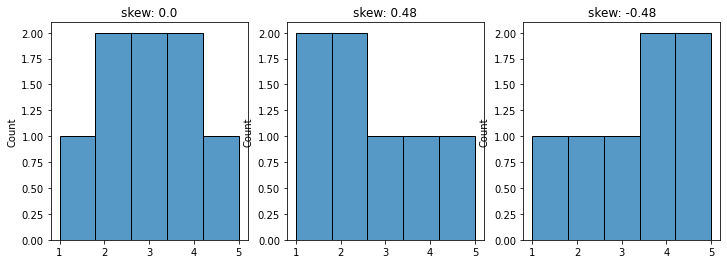

In [9]:
plt.figure(figsize = (12,4))
for i, x in enumerate([x1, x2, x3]):
    plt.subplot(1, 3, i + 1)
    sns.histplot(x, bins = 5)
    plt.title(f'skew: {np.round(skew(x), 2)}')
plt.show()

### **| 첨도(kurtosis)**


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0306-02.png?raw=true width=300>
</p>


\begin{align}
\text{kurtosis} = 
\frac{\tfrac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^4}{\left(\tfrac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2\right)^2} - 3
\end{align}

```
from scipy.stats import kurtosis
kurtosis(a)
```

In [10]:
from scipy.stats import kurtosis
kurtosis(a)

-0.0467663244783294

* 세개의 데이터의 분포를 그리고 각각의 첨도도 구해봅니다.

```
x1 = [1,2,3,4,5,]
x2 = [1,2,3,4,5,1]
x3 = [1,2,3,4,5,1,1,1]
```

In [12]:
x1 = [1,2,3,4,5,]
x2 = [1,2,3,4,5,1]
x3 = [1,2,3,4,5,1,1,1]

print('x1 kurtosis : ', kurtosis(x1))
print('x2 kurtosis : ', kurtosis(x2))
print('x3 kurtosis : ', kurtosis(x3))

x1 kurtosis :  -1.3
x2 kurtosis :  -1.3650000000000002
x3 kurtosis :  -0.9975510204081632


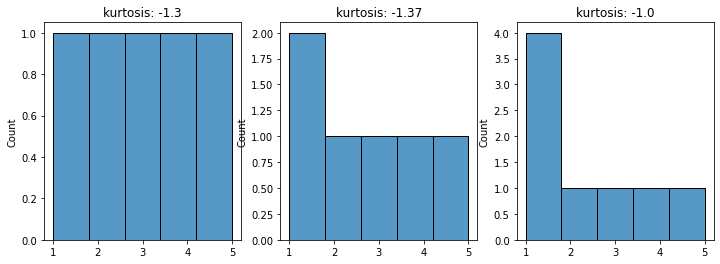

In [13]:
plt.figure(figsize = (12,4))

for i, x in enumerate([x1, x2, x3]):
    plt.subplot(1, 3, i + 1)
    sns.histplot(x, bins = 5 )
    plt.title(f'kurtosis: {np.round(kurtosis(x), 2)}')
plt.show()

## 예제
---

#### **예제 01**

1. 지난 시간에 배운 scipy 라이브러리의 gamma 함수를 사용합니다. 

2. a값이 4인 감마함수로 부터 표본을 1000개 추출하고 `x3`로 바인딩합니다.

4. a값이 12인 감마함수로 부터 표본을 1000개 추출하고 `x4`로 바인딩합니다.

6. `x3`의 모든 요소에 -1을 곱한 후 `x2`로 바인딩합니다.

6. `x4`의 모든 요소에 -1을 곱한 후 `x1`로 바인딩합니다.

7. `x1, x2, x3, x4`의 분포를 각각 그립니다.

7. `x1, x2, x3, x4`의 왜도를 각각 구합니다.

7. `x1, x2, x3, x4`의 첨도를 각각 구합니다.


In [23]:
import scipy as sp
from scipy.stats import gamma

def get_x(a, n = 1000):
    g = gamma(a)
    np.random.seed(0)
    rvs = g.rvs(n)
    return rvs

x3 = get_x(4)
x4 = get_x(12)

x2 = x3 * -1
x1 = x4 * -1

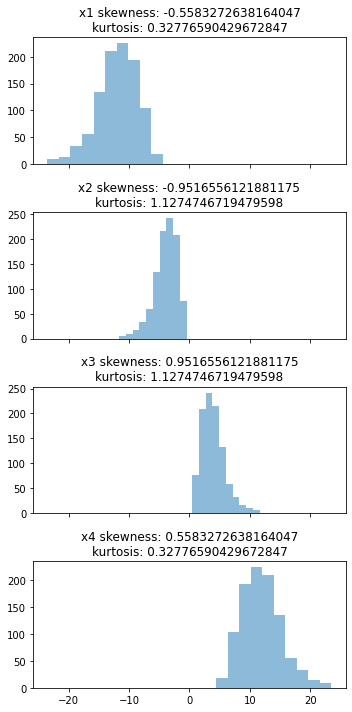

In [30]:
fig, axes = plt.subplots(4,1, figsize = (5,10), sharex = True)

for i, j in enumerate([x1, x2, x3, x4]):
    axes[i].hist(j, alpha = 0.5)
    axes[i].set_title(f'x{i + 1} skewness: {skew(j)}\nkurtosis: {kurtosis(j)}')
    fig.tight_layout()


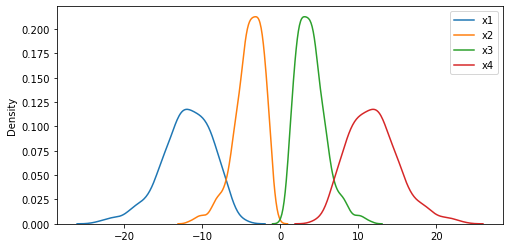

In [27]:
fig = plt.figure(figsize=(8,4))
xs = ['x1','x2','x3','x4']
for x in xs:
  sns.kdeplot(eval(x))
plt.legend(xs)
plt.show()

No handles with labels found to put in legend.


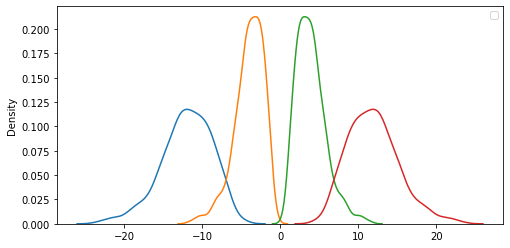

In [33]:
fig = plt.figure(figsize=(8,4))
xs = ['x1', 'x2', 'x3', 'x4']
for x in xs:
  sns.kdeplot(eval(x))
plt.legend()
plt.show()

In [31]:
print('x1 skewness : ', np.round(skew(x1),2), 'kurtosis : ', np.round(kurtosis(x1),2))
print('x2 skewness : ', skew(x2), 'kurtosis : ', kurtosis(x2))
print('x3 skewness : ', skew(x3), 'kurtosis : ', kurtosis(x3))
print('x4 skewness : ', skew(x4), 'kurtosis : ', kurtosis(x4))

x1 skewness :  -0.56 kurtosis :  0.33
x2 skewness :  -0.9516556121881175 kurtosis :  1.1274746719479598
x3 skewness :  0.9516556121881175 kurtosis :  1.1274746719479598
x4 skewness :  0.5583272638164047 kurtosis :  0.32776590429672847


#### **예제 02**

타이타닉 데이터셋을 가져오고, 수치자료형 변수들의 **산포통계**와 **분포통계**를 정리하세요.

In [ ]:
df = pd.read_csv('/content/train.csv')
df.info() 
# 수치자료형 (PassengerId, Survivied, Pclass, Age, SibSp, Parch, Fare)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId

In [ ]:
def minmax(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

def standard(x):
    return  (x - np.mean(x)) / np.std(x, ddof = 1)

In [ ]:
# 산포 통계(분산, 표준편차, 변동계수, 스케일링, 범위와 사분위 범위)
Id = df['PassengerId']
print('분산 : ', np.var(Id, ddof = 1))
print('표준편차 : ', np.std(Id, ddof = 1))
print('minmax 스케일링 : ', minmax(Id))
print('standard(z-score) 스케일링 : ', standard(Id))
print('범위 : ', np.ptp(Id) )
print('사분위 범위 : ', np.quantile(Id, 0.75) - np.quantile(Id, 0.25))

# 분포 통계(백분위수, 사분위수, 왜도, 첨도)
print('백분위수(50%) : ', np.percentile(Id, 50))
print('사분위수(2Q, 중위수) : ', np.quantile(Id, 0.5))
print('skewness : ', skew(Id))
print('kurtosis : ', kurtosis(Id))

Survivied

In [ ]:
# 산포 통계(분산, 표준편차, 변동계수, 스케일링, 범위와 사분위 범위)
sur = df['Survived']
print('분산 : ', np.var(sur, ddof = 1))
print('표준편차 : ', np.std(sur, ddof = 1))

plt.subplot(2,1,1)
ax1 = sns.histplot(minmax(sur))
ax1.set_title('minmax scaling')
plt.subplot(2,1,2)
ax2 = sns.histplot(standard(sur))
ax2.set_title('standard(z-score) scaling')
plt.tight_layout()
plt.show()

print('범위 : ', np.ptp(sur) )
print('사분위 범위 : ', np.quantile(sur, 0.75) - np.quantile(sur, 0.25))

# 분포 통계(백분위수, 사분위수, 왜도, 첨도)
print('백분위수(50%) : ', np.percentile(sur, 50))
print('사분위수(2Q, 중위수) : ', np.quantile(sur, 0.5))
print('skewness : ', skew(sur))
print('kurtosis : ', kurtosis(sur))

Pclass

분산 :  0.6990151199889065
표준편차 :  0.8360712409770513


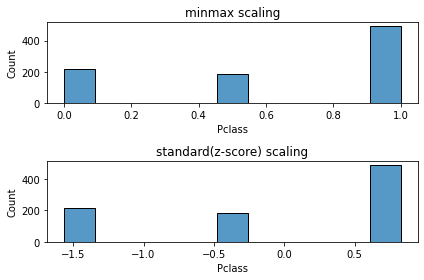

범위 :  2
사분위 범위 :  1.0
백분위수(50%) :  3.0
사분위수(2Q, 중위수) :  3.0
skewness :  -0.6294858816096934
kurtosis :  -1.2795696818700388


In [ ]:
# 산포 통계(분산, 표준편차, 변동계수, 스케일링, 범위와 사분위 범위)
pc = df['Pclass']
print('분산 : ', np.var(pc, ddof = 1))
print('표준편차 : ', np.std(pc, ddof = 1))

plt.subplot(2,1,1)
ax1 = sns.histplot(minmax(pc))
ax1.set_title('minmax scaling')
plt.subplot(2,1,2)
ax2 = sns.histplot(standard(pc))
ax2.set_title('standard(z-score) scaling')
plt.tight_layout()
plt.show()

print('범위 : ', np.ptp(pc) )
print('사분위 범위 : ', np.quantile(pc, 0.75) - np.quantile(pc, 0.25))

# 분포 통계(백분위수, 사분위수, 왜도, 첨도)
print('백분위수(50%) : ', np.percentile(pc, 50))
print('사분위수(2Q, 중위수) : ', np.quantile(pc, 0.5))
print('skewness : ', skew(pc))
print('kurtosis : ', kurtosis(pc))

Age

분산 :  211.0191247463081
표준편차 :  14.526497332334044


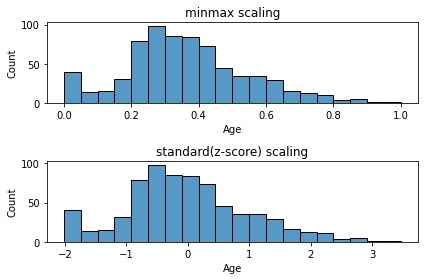

범위 :  79.58
사분위 범위 :  17.875
백분위수(50%) :  28.0
사분위수(2Q, 중위수) :  28.0
skewness :  0.3882898514698657
kurtosis :  0.16863657224286044


In [ ]:
# 산포 통계(분산, 표준편차, 변동계수, 스케일링, 범위와 사분위 범위)
ag = df['Age'].dropna()
print('분산 : ', np.var(ag, ddof = 1))
print('표준편차 : ', np.std(ag, ddof = 1))

plt.subplot(2,1,1)
ax1 = sns.histplot(minmax(ag))
ax1.set_title('minmax scaling')
plt.subplot(2,1,2)
ax2 = sns.histplot(standard(ag))
ax2.set_title('standard(z-score) scaling')
plt.tight_layout()
plt.show()

print('범위 : ', np.ptp(ag) )
print('사분위 범위 : ', np.quantile(ag, 0.75) - np.quantile(ag, 0.25))

# 분포 통계(백분위수, 사분위수, 왜도, 첨도)
print('백분위수(50%) : ', np.percentile(ag, 50))
print('사분위수(2Q, 중위수) : ', np.quantile(ag, 0.5))
print('skewness : ', skew(ag))
print('kurtosis : ', kurtosis(ag))

SibSp

분산 :  1.2160430774662894
표준편차 :  1.1027434322934275


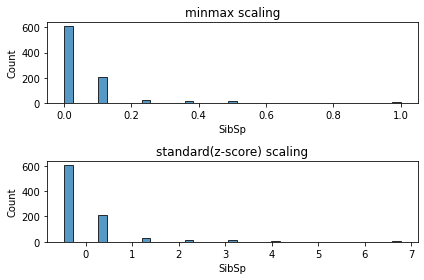

범위 :  8
사분위 범위 :  1.0
백분위수(50%) :  0.0
사분위수(2Q, 중위수) :  0.0
skewness :  3.6891276847759507
kurtosis :  17.77351174692092


In [ ]:
# 산포 통계(분산, 표준편차, 변동계수, 스케일링, 범위와 사분위 범위)
ss = df['SibSp'].dropna()
print('분산 : ', np.var(ss, ddof = 1))
print('표준편차 : ', np.std(ss, ddof = 1))

plt.subplot(2,1,1)
ax1 = sns.histplot(minmax(ss))
ax1.set_title('minmax scaling')
plt.subplot(2,1,2)
ax2 = sns.histplot(standard(ss))
ax2.set_title('standard(z-score) scaling')
plt.tight_layout()
plt.show()

print('범위 : ', np.ptp(ss) )
print('사분위 범위 : ', np.quantile(ss, 0.75) - np.quantile(ss, 0.25))

# 분포 통계(백분위수, 사분위수, 왜도, 첨도)
print('백분위수(50%) : ', np.percentile(ss, 50))
print('사분위수(2Q, 중위수) : ', np.quantile(ss, 0.5))
print('skewness : ', skew(ss))
print('kurtosis : ', kurtosis(ss))

Parch

분산 :  0.6497282437357467
표준편차 :  0.8060572211299559


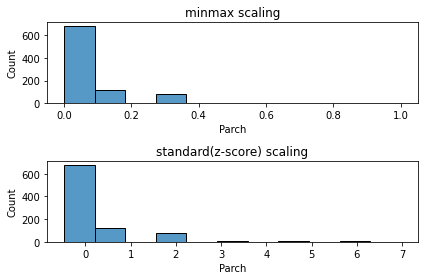

범위 :  6
사분위 범위 :  0.0
백분위수(50%) :  0.0
사분위수(2Q, 중위수) :  0.0
skewness :  2.7444867379203735
kurtosis :  9.716613236667277


In [ ]:
# 산포 통계(분산, 표준편차, 변동계수, 스케일링, 범위와 사분위 범위)
par = df['Parch'].dropna()
print('분산 : ', np.var(par, ddof = 1))
print('표준편차 : ', np.std(par, ddof = 1))

plt.subplot(2,1,1)
ax1 = sns.histplot(minmax(par))
ax1.set_title('minmax scaling')
plt.subplot(2,1,2)
ax2 = sns.histplot(standard(par))
ax2.set_title('standard(z-score) scaling')
plt.tight_layout()
plt.show()

print('범위 : ', np.ptp(par) )
print('사분위 범위 : ', np.quantile(par, 0.75) - np.quantile(par, 0.25))

# 분포 통계(백분위수, 사분위수, 왜도, 첨도)
print('백분위수(50%) : ', np.percentile(par, 50))
print('사분위수(2Q, 중위수) : ', np.quantile(par, 0.5))
print('skewness : ', skew(par))
print('kurtosis : ', kurtosis(par))

Fare

분산 :  2469.436845743117
표준편차 :  49.693428597180905


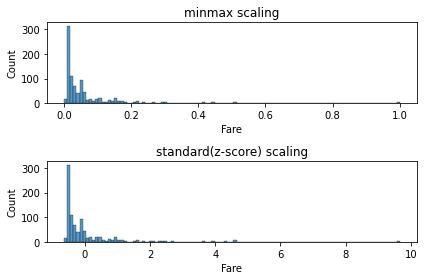

범위 :  512.3292
사분위 범위 :  23.0896
백분위수(50%) :  14.4542
사분위수(2Q, 중위수) :  14.4542
skewness :  4.7792532923723545
kurtosis :  33.20428925264474


In [ ]:
# 산포 통계(분산, 표준편차, 변동계수, 스케일링, 범위와 사분위 범위)
fare = df['Fare'].dropna()
print('분산 : ', np.var(fare, ddof = 1))
print('표준편차 : ', np.std(fare, ddof = 1))

plt.subplot(2,1,1)
ax1 = sns.histplot(minmax(fare))
ax1.set_title('minmax scaling')
plt.subplot(2,1,2)
ax2 = sns.histplot(standard(fare))
ax2.set_title('standard(z-score) scaling')
plt.tight_layout()
plt.show()

print('범위 : ', np.ptp(fare) )
print('사분위 범위 : ', np.quantile(fare, 0.75) - np.quantile(fare, 0.25))

# 분포 통계(백분위수, 사분위수, 왜도, 첨도)
print('백분위수(50%) : ', np.percentile(fare, 50))
print('사분위수(2Q, 중위수) : ', np.quantile(fare, 0.5))
print('skewness : ', skew(fare))
print('kurtosis : ', kurtosis(fare))